## **Business Scenario**
A retail bank runs marketing campaigns to sell term deposit plans to customers.

Calling every customer is expensive and inefficient.
The bank wants a **rule-based system** that can decide:<br>
`“Should we contact this customer or not?”`<br>
Management prefers a model whose decisions can be:
- Clearly explained
- Converted into if–else rules
- Understood by non-technical staff
 

### **Tasks**
1. Load the dataset and understand customer attributes such as:
    - Age
    - Job
    - Balance
    - Loan status
Contact history
2. Identify input features that may influence whether a customer subscribes to a
term deposit.
3. Build a model that can classify customers into:
    - Likely to subscribe
    - Not likely to subscribe
4. Train the model using historical customer data.
5. Predict the outcome for unseen customer records.
6. Evaluate the model's performance using suitable classification metrics.
7. Visualize the decision-making logic of the model.

#### 1.Dataset - Bank Marketing Dataset

In [31]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\DELL\Downloads\bank_marketing_dataset.csv")

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [18]:
df = df[['deposit','age', 'job', 'balance', 'loan', 'contact']]

In [19]:
#these features may influence  whether a customer subscribes to a term deposit.
selected_features = [
    'age', 'job', 'balance', 'loan', 'contact' 
]

In [21]:
df.isnull().sum()

deposit    0
age        0
job        0
balance    0
loan       0
contact    0
dtype: int64

In [24]:
df.head()

,deposit,age,job,balance,loan,contact
0,yes,59,admin.,2343,no,unknown
1,yes,56,admin.,45,no,unknown
2,yes,41,technician,1270,no,unknown
3,yes,55,services,2476,no,unknown
4,yes,54,admin.,184,no,unknown


In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.select_dtypes(include='object'):
    df[col] = le.fit_transform(df[col])
df.head()

,deposit,age,job,balance,loan,contact
0,1,59,0,2343,0,2
1,1,56,0,45,0,2
2,1,41,9,1270,0,2
3,1,55,7,2476,0,2
4,1,54,0,184,0,2


In [29]:
#outlier
# outlier detection for all numeric columns
def detect(df):
    outlier_cols = []

    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

    for col in numeric_cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1

        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr

        if ((df[col] < lower) | (df[col] > upper)).any():
            outlier_cols.append(col)

    return outlier_cols
outlier_cols = detect(df)
print(outlier_cols)

['age', 'balance', 'loan']


In [42]:
df['balance'] = df['balance'].clip(
    lower=df['balance'].quantile(0.01),
    upper=df['balance'].quantile(0.99)
)
df['age'] = df['age'].clip(18, 90)

In [43]:
x = df[selected_features]
y = df['deposit']

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [60]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=4
)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [61]:
y_pred = model.predict(x_test)

Accuracy: 0.6578593819973131
Classification report: 
              precision    recall  f1-score   support

           0       0.70      0.60      0.65      1166
           1       0.62      0.72      0.67      1067

    accuracy                           0.66      2233
   macro avg       0.66      0.66      0.66      2233
weighted avg       0.66      0.66      0.66      2233

Confusion matrix:



<Axes: >

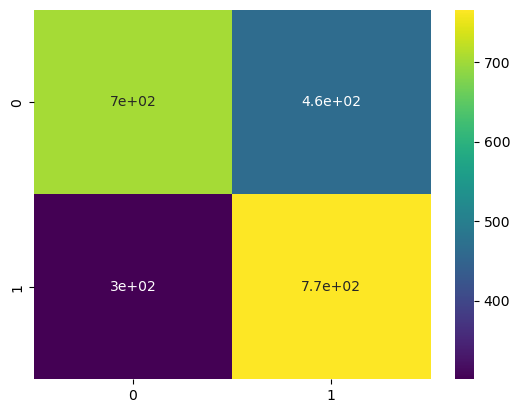

In [62]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import seaborn as sns
print(f"Accuracy: {accuracy_score(y_test,y_pred)}")
print(f"Classification report: \n{classification_report(y_test,y_pred)}")
print("Confusion matrix:\n")
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='viridis')

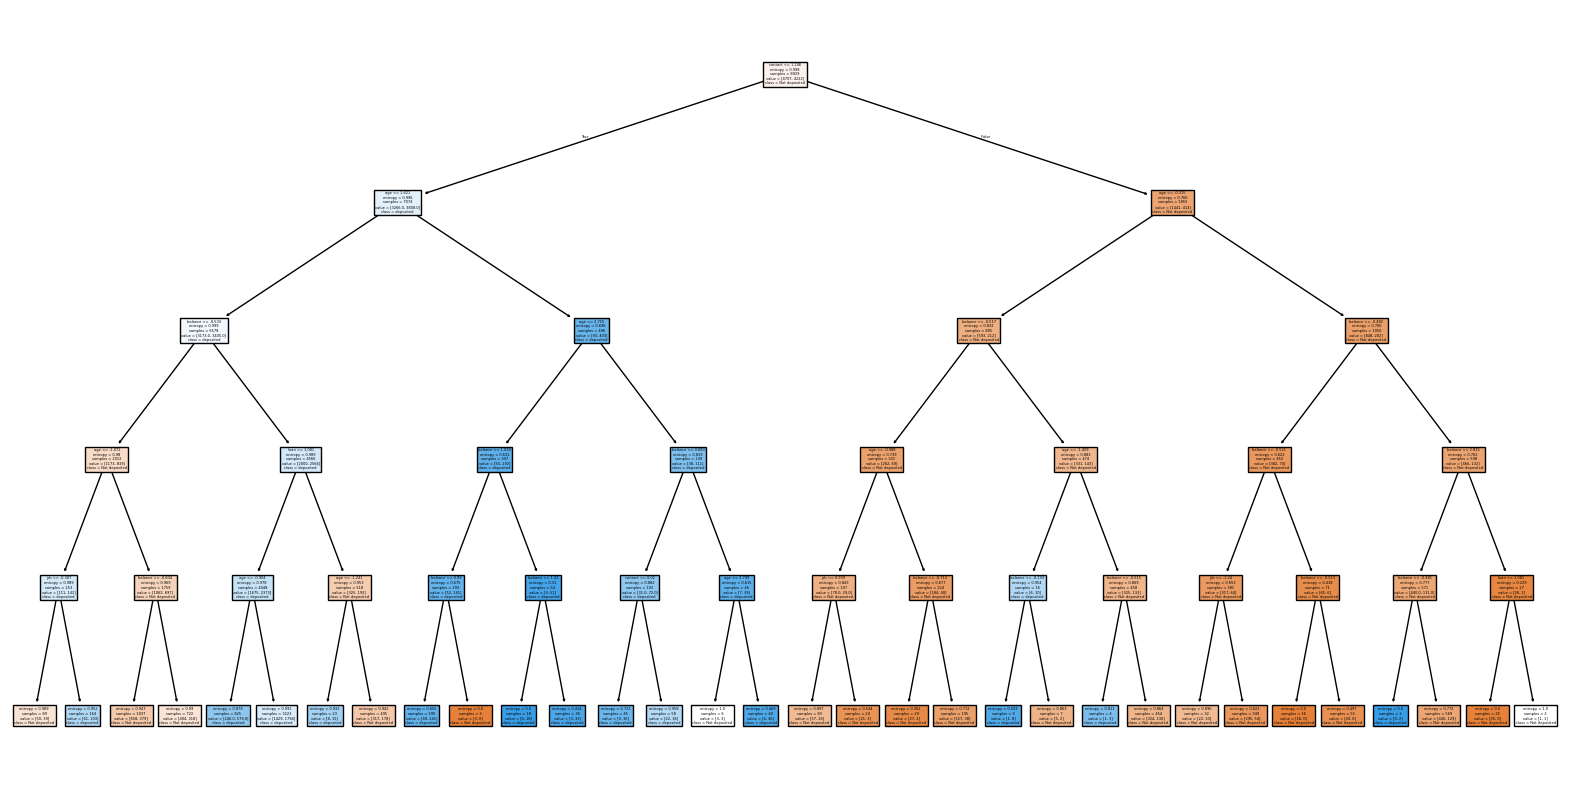

In [59]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(
    model,
    feature_names = x.columns,
    class_names = ["Not deposited","deposited"],
    filled = True
)
plt.show()